In [9]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import os
import glob
import pickle

import sys
sys.path.insert(0, '..')
from ca_funcs import *
from utils import *


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


12.0 layers detected
INFO:tensorflow:Restoring parameters from ../resources/test_model.ckpt


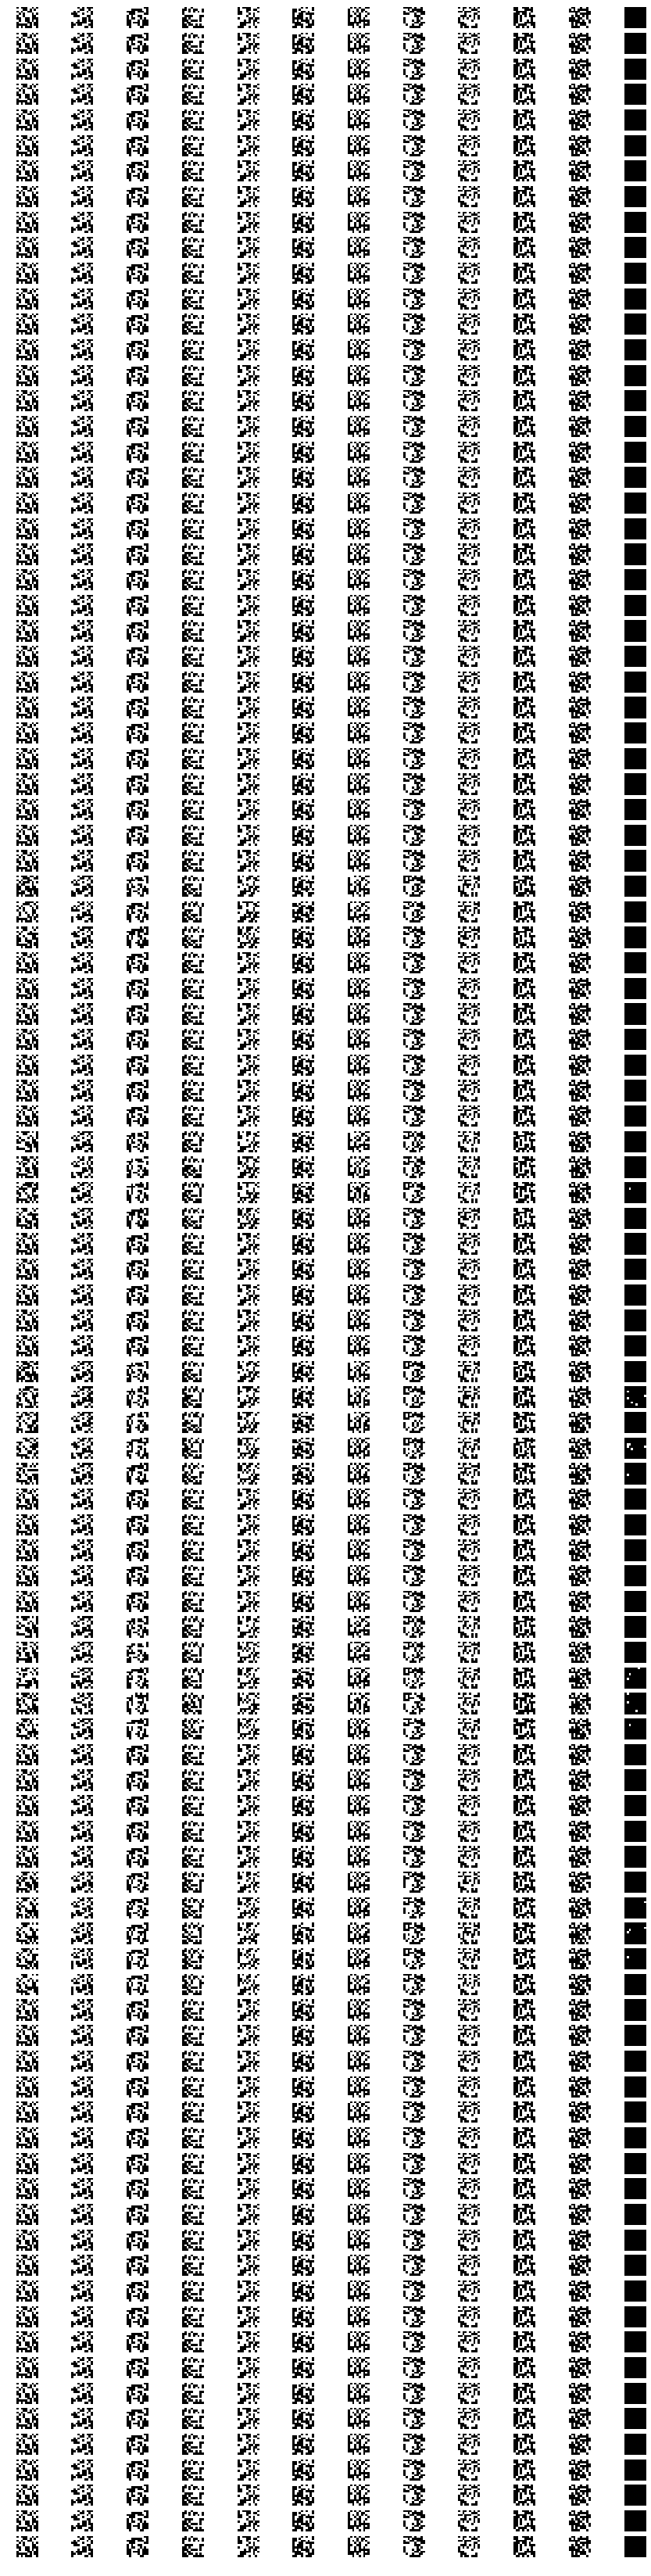

In [11]:
from train_ca import *

try:
    tf.reset_default_graph()
    sess.close()
except:
    pass
sess = tf.InteractiveSession()

wspan, hspan = 10, 10
model_str = '../resources/test_model.ckpt'

## Define model
test_model = ConvNet(sess, ckpt_path=model_str, input_dim=(wspan,hspan))

## Define input
X_test = make_glider(10)

## Run model and return features
features = test_model.get_features([X_test])

plt.figure(figsize=(15, 60))
layers = len(features)
for i in range(layers):
    layer = features[i][0]

    neurons = len(layer)
    for j in range(neurons):
        index = (j*layers)+i+1
        neurone = np.array(layer[j]).reshape(10, 10)
        
        plt.subplot(neurons, layers, index)
        plt.imshow(neurone)
        plt.axis('off')